In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('conversion.csv')

df.head()

**ad_id** – идентификатор объявления (рекламы)

**xyz_campaign_id** – идентификатор рекламной кампании в базе компании X

**fb_campaign_id** – идентификатор кампании в Facebook

**age** – возрастная группа, которой показывалась реклама

**gender** – пол тех, кому показывалась реклама

**interest** –код, указывающий категорию, к которой относится интерес пользователя (соответствие число – интерес, условно: 1 – животные, 2 – автомобили, 3 – тортики и т.д.)

**impressions** – число показов

**clicks** – число кликов

**spent** – сумма, которую компания потратила на показ объявления 

**total_conversion** – количество людей, которые заинтересовались продуктом после просмотра рекламы

**approved_conversion** – количество людей, которые купили продукт после просмотра рекламы

**Задача 1.**

Загрузите данные, проверьте число наблюдений и столбцов, типы данных, наличие пропущенных значений, какие уникальные значения встречаются.

Сколько уникальных рекламных кампаний было проведено? 

Note: использовать идентификатор кампании в базе Х – xyz_campaign_id.

In [3]:
df.shape

(1143, 11)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ad_id                1143 non-null   int64  
 1   xyz_campaign_id      1143 non-null   int64  
 2   fb_campaign_id       1143 non-null   int64  
 3   age                  1143 non-null   object 
 4   gender               1143 non-null   object 
 5   interest             1143 non-null   int64  
 6   Impressions          1143 non-null   int64  
 7   Clicks               1143 non-null   int64  
 8   Spent                1143 non-null   float64
 9   Total_Conversion     1143 non-null   int64  
 10  Approved_Conversion  1143 non-null   int64  
dtypes: float64(1), int64(8), object(2)
memory usage: 98.4+ KB


In [5]:
df.isnull().sum()

ad_id                  0
xyz_campaign_id        0
fb_campaign_id         0
age                    0
gender                 0
interest               0
Impressions            0
Clicks                 0
Spent                  0
Total_Conversion       0
Approved_Conversion    0
dtype: int64

In [6]:
df.dtypes

ad_id                    int64
xyz_campaign_id          int64
fb_campaign_id           int64
age                     object
gender                  object
interest                 int64
Impressions              int64
Clicks                   int64
Spent                  float64
Total_Conversion         int64
Approved_Conversion      int64
dtype: object

In [7]:
df.head(2)

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0


In [8]:
df.xyz_campaign_id.unique()

array([ 916,  936, 1178])

In [9]:
df.fb_campaign_id.nunique()

691

**Задание 3**


Постройте график распределения числа показов (Impressions – сколько раз пользователи увидели данное объявление) для каждой рекламной кампании в Facebook, прологарифмировав значения. Выберите верные утверждения:

In [10]:
df.ad_id.nunique()

1143

In [11]:
import seaborn as sns
import numpy as np

In [12]:
data = df.groupby(["fb_campaign_id"], as_index=False).agg({'Impressions':'sum'})

In [13]:
data['log'] = np.log(data.Impressions)

In [14]:
data

,fb_campaign_id,Impressions,log
0,103916,7350,8.902456
1,103917,17861,9.790375
2,103920,693,6.541030
3,103928,8392,9.035034
4,103929,1915,7.557473
...,...,...,...
686,179977,1129773,13.937527
687,179978,637549,13.365386
688,179979,151531,11.928546
689,179981,790253,13.580108


/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


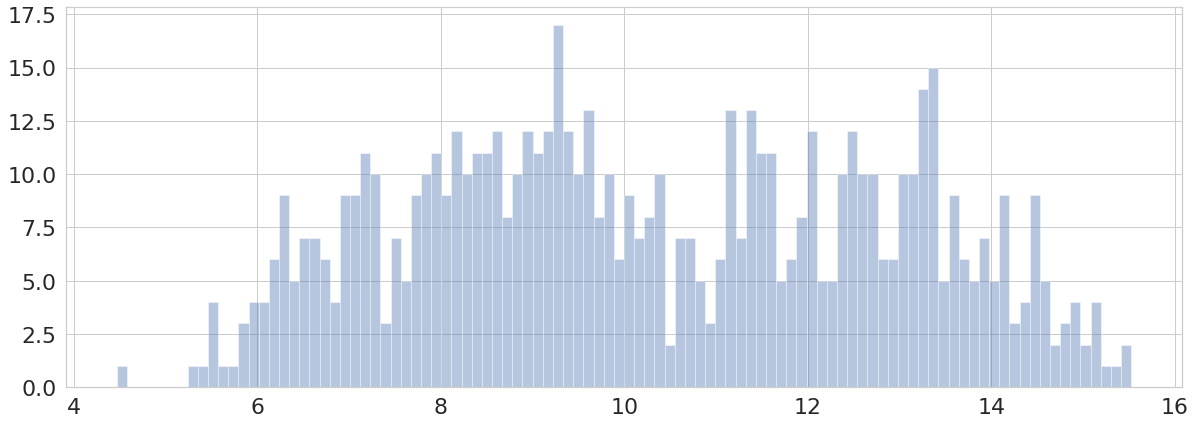

In [15]:
sns.set(
    font_scale =2,
    style      ="whitegrid",
    rc         ={'figure.figsize':(20,7)}
)

sns.distplot(x = data.log, kde=False, bins=100)

In [16]:
# Распределение бимодальное
# Полученное распределение не является нормальным

**Задание 4**

Теперь посчитаем ещё несколько полезных метрик. Первая – CTR (click-through rate), которая показывает кликабельность, т.е. отношение числа кликов к количеству показов.

CTR= 
impressions
clicks
​	
 

Создайте новую колонку, затем посмотрите на описательные статистики. В качестве ответа укажите ad_id объявления с наибольшим CTR.

In [17]:
df.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1


In [18]:
df['CTR'] = df.Clicks / df.Impressions

In [19]:
df.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,CTR
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1,0.000136
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0,0.000112
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0,0.000000
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0,0.000235
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1,0.000242


In [20]:
df.sort_values("CTR", ascending=False).ad_id[0]

708746

In [21]:
df.sort_values("CTR", ascending=False)

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,CTR
150,738637,936,109857,45-49,F,24,944,1,1.42,1,0,0.001059
440,950224,936,123464,40-44,M,20,2367,2,2.84,1,1,0.000845
505,951779,936,123723,45-49,F,27,3277,2,2.68,1,0,0.000610
476,951202,936,123627,45-49,F,26,5307,3,4.29,2,1,0.000565
448,950537,936,123516,40-44,M,36,1884,1,1.41,1,0,0.000531
...,...,...,...,...,...,...,...,...,...,...,...,...
270,777166,936,115625,30-34,M,63,2383,0,0.00,1,1,0.000000
269,777131,936,115619,35-39,M,16,6359,0,0.00,1,0,0.000000
268,777130,936,115619,35-39,M,16,6260,0,0.00,1,0,0.000000
266,776935,936,115587,45-49,M,36,1136,0,0.00,1,1,0.000000


In [22]:
list(df.sort_values("CTR", ascending=False).ad_id)[0]

738637

**Задание 5**

Визуализируйте CTR с разбивкой по номеру рекламной кампании (xyz_campaign_id). Какому графику соответствует распределение CTR кампании 916?

In [23]:
import matplotlib.pyplot as plt

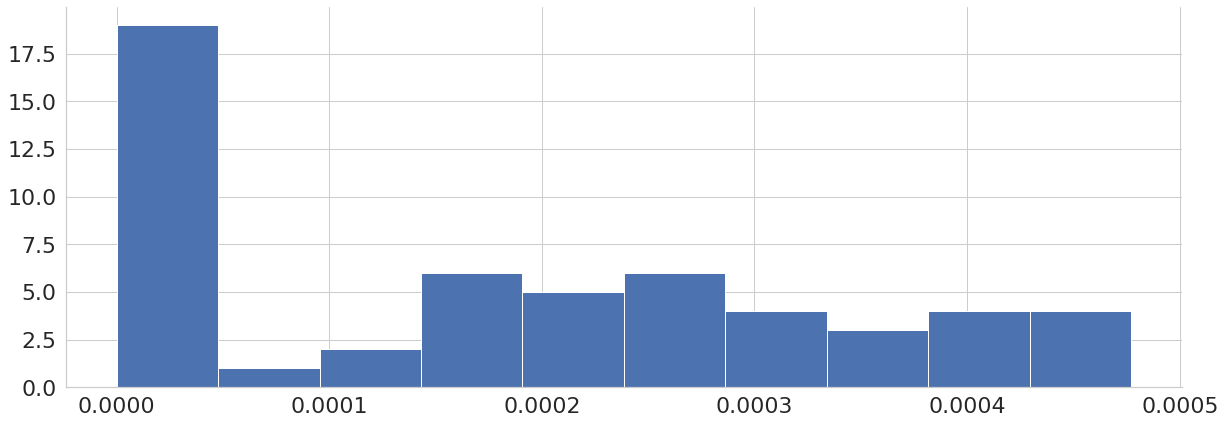

In [24]:
plt.hist(df.query("xyz_campaign_id == 916").CTR)
sns.despine()

In [25]:
df.query("xyz_campaign_id == 916")

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,CTR
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1,0.000136
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0,0.000112
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0,0.000000
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0,0.000235
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1,0.000242
5,708820,916,103929,30-34,M,29,1915,0,0.00,1,1,0.000000
6,708889,916,103940,30-34,M,15,15615,3,4.77,1,0,0.000192
7,708895,916,103941,30-34,M,16,10951,1,1.27,1,1,0.000091
8,708953,916,103951,30-34,M,27,2355,1,1.50,1,0,0.000425
9,708958,916,103952,30-34,M,28,9502,3,3.16,1,0,0.000316


**Задание 6**

CPC (cost-per-click) – стоимость за клик пользователя по объявлению. Рассчитывается путём деления суммы потраченных денег на общее число кликов:

$$
CPC= \frac{clicks}{spent}
$$

Выведите описательные статистики для новой переменной, посмотрите на форму распределения. В ответе укажите межквартильный размах, округленный до двух знаков после точки.

Обратите внимание, что в столбце могут встретиться NaN. Если вы используете функцию iqr из scipy, то следует указать аргумент nan_policy='omit', чтобы их проигнорировать. При построении графика необходимо использовать метод .dropna().

In [26]:
df.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,CTR
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1,0.000136
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0,0.000112
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0,0.000000
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0,0.000235
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1,0.000242


In [27]:
df['CPC'] = df.Spent / df.Clicks

In [28]:
df.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,CTR,CPC
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1,0.000136,1.43
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0,0.000112,0.91
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0,0.000000,NaN
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0,0.000235,1.25
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1,0.000242,1.29


In [29]:
data = df.dropna()

In [30]:
sns.set(
    font_scale =1.25,
    style      ="whitegrid",
    rc         ={'figure.figsize':(20,7)}
)

/opt/tljh/user/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


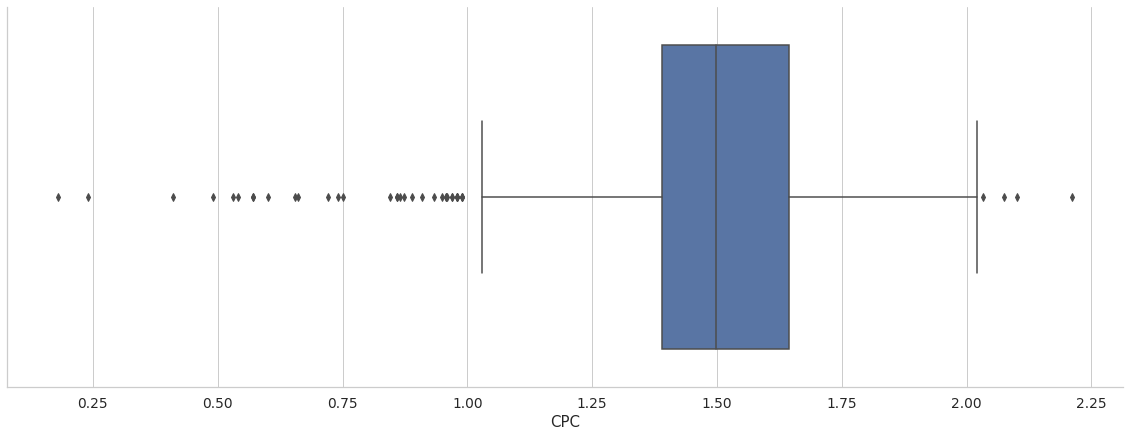

In [31]:
sns.boxplot(df.CPC)
sns.despine()

In [32]:
import scipy

scipy.stats.iqr(df.CPC, axis=None, 
#                 rng=(25, 75), 
                scale=1.0, 
                nan_policy='omit', 
#                 interpolation='linear', 
                keepdims=False)

0.25436369905

In [33]:
1.63 - 1.38

0.25

In [34]:
# scipy.stats.iqr(x, axis=None, rng=(25, 75), scale=1.0, nan_policy='propagate', interpolation='linear', keepdims=False)

In [35]:
df.CPC.min()

0.180000007

In [36]:
df.CPC.max()

2.2119999399999997

In [37]:
df.CPC.mean()

1.4993474467280832

In [38]:
df.CPC.median()

1.498273039292763

/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


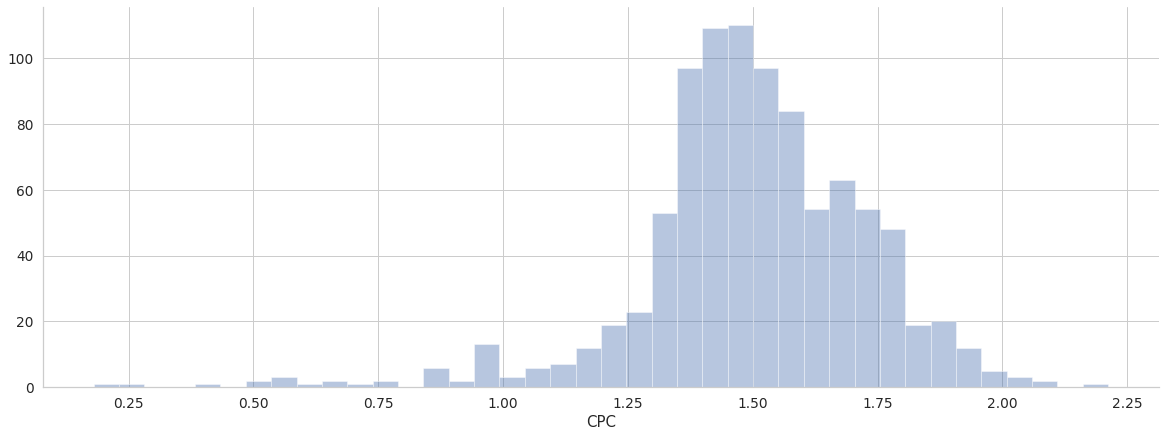

In [39]:
sns.distplot(df.CPC, kde=False)
sns.despine()

**Задание 7**

Визуализируйте CPC с разбивкой по полу пользователей, которым были показаны объявления. Какой график получился?

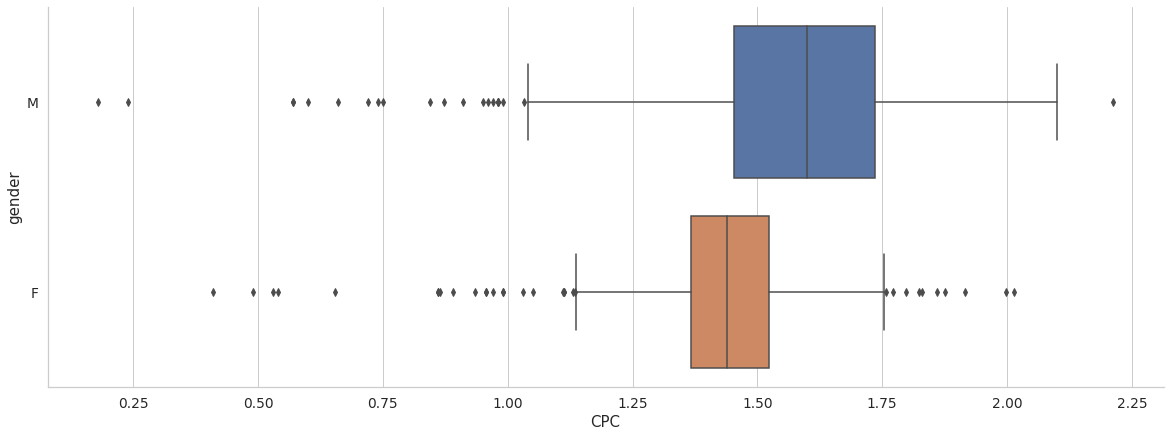

In [44]:
sns.boxplot(data = df, x='CPC', y='gender')
sns.despine()

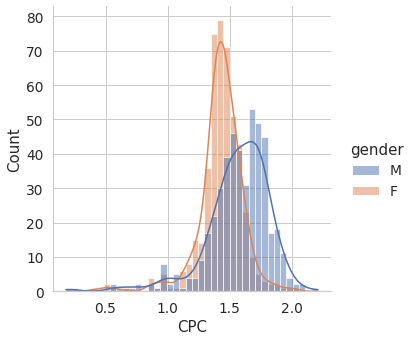

In [62]:

sns.displot(data=df.dropna(),x='CPC', hue='gender', kde=True)

/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


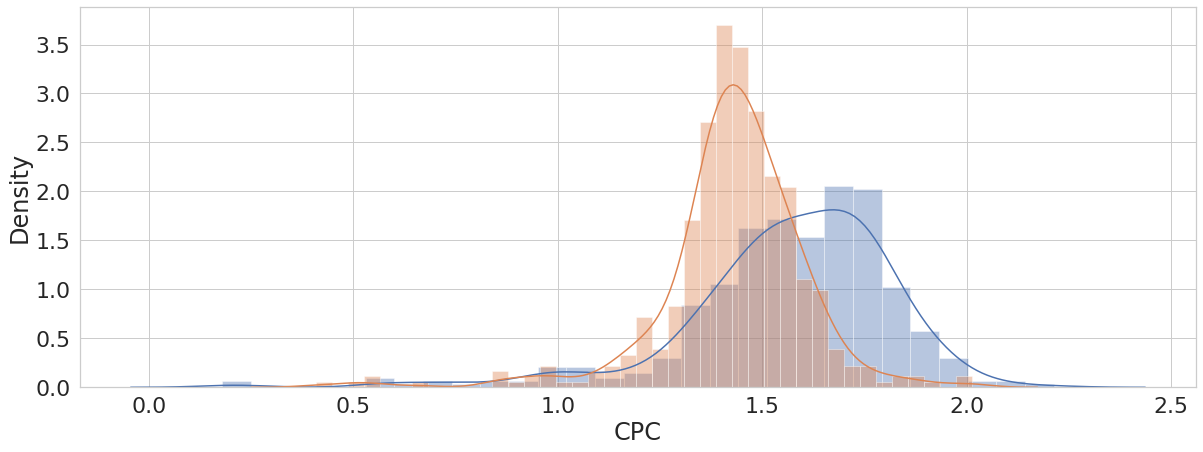

In [72]:
sns.set(
    font_scale =2,
    style      ="whitegrid",
    rc         ={'figure.figsize':(20,7)}
)

sns.distplot(df.dropna().query("gender == 'M'").CPC)
sns.distplot(df.dropna().query("gender == 'F'").CPC)


**Задание 8**

Конверсия (conversion rate) – отношение числа пользователей, совершивших целевое действие на определенном этапе, к общему числу тех, кто дошел до данного этапа.

Посчитайте конверсию из клика в покупку. В качестве ответа укажите конверсию для объявления 1121814 в процентах, округлив значение до 2 знаков после точки. Например, если значение кликов равно 10, а покупок – 2, то CR на данном этапе составляет 2/10=0.2=20.

Note: клики – Clicks, покупки – Approved_Conversion.

In [73]:
df.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,CTR,CPC
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1,0.000136,1.43
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0,0.000112,0.91
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0,0.000000,NaN
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0,0.000235,1.25
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1,0.000242,1.29


**ad_id** – идентификатор объявления (рекламы)

**xyz_campaign_id** – идентификатор рекламной кампании в базе компании X

**fb_campaign_id** – идентификатор кампании в Facebook

**age** – возрастная группа, которой показывалась реклама

**gender** – пол тех, кому показывалась реклама

**interest** –код, указывающий категорию, к которой относится интерес пользователя (соответствие число – интерес, условно: 1 – животные, 2 – автомобили, 3 – тортики и т.д.)

**impressions** – число показов

**clicks** – число кликов

**spent** – сумма, которую компания потратила на показ объявления 

**total_conversion** – количество людей, которые заинтересовались продуктом после просмотра рекламы

**approved_conversion** – количество людей, которые купили продукт после просмотра рекламы

In [87]:
df['conversion'] = df.Approved_Conversion / df.Clicks

In [88]:
df.head(10)

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,CTR,CPC,conversion
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1,0.000136,1.430000,1.0
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0,0.000112,0.910000,0.0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0,0.000000,NaN,NaN
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0,0.000235,1.250000,0.0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1,0.000242,1.290000,1.0
5,708820,916,103929,30-34,M,29,1915,0,0.00,1,1,0.000000,NaN,inf
6,708889,916,103940,30-34,M,15,15615,3,4.77,1,0,0.000192,1.590000,0.0
7,708895,916,103941,30-34,M,16,10951,1,1.27,1,1,0.000091,1.270000,1.0
8,708953,916,103951,30-34,M,27,2355,1,1.50,1,0,0.000425,1.500000,0.0
9,708958,916,103952,30-34,M,28,9502,3,3.16,1,0,0.000316,1.053333,0.0


In [89]:
round(float(df[df.ad_id == 1121814].conversion) * 100, 2)

3.09

In [83]:
df[df.ad_id == 1121814].conversion

860    32.384615
Name: conversion, dtype: float64

In [91]:
df.query("ad_id == 708820")

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,CTR,CPC,conversion
5,708820,916,103929,30-34,M,29,1915,0,0.0,1,1,0.0,NaN,inf
